In [38]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib   # save the model
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

sns.set_style("whitegrid")

In [39]:
# load th data set
diabetes_dataset = pd.read_csv('diabetes.csv')

In [40]:
# the first 5 rows of the data set
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [41]:
# Dimensions of the dataset
diabetes_dataset.shape

(768, 9)

In [42]:
 # Checking statistics of the diabetes_dataset
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [43]:
# checking the outcome distribution of the diabeties dataset
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [44]:
# checking for the average glucose between diabetes and non-diabetes
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


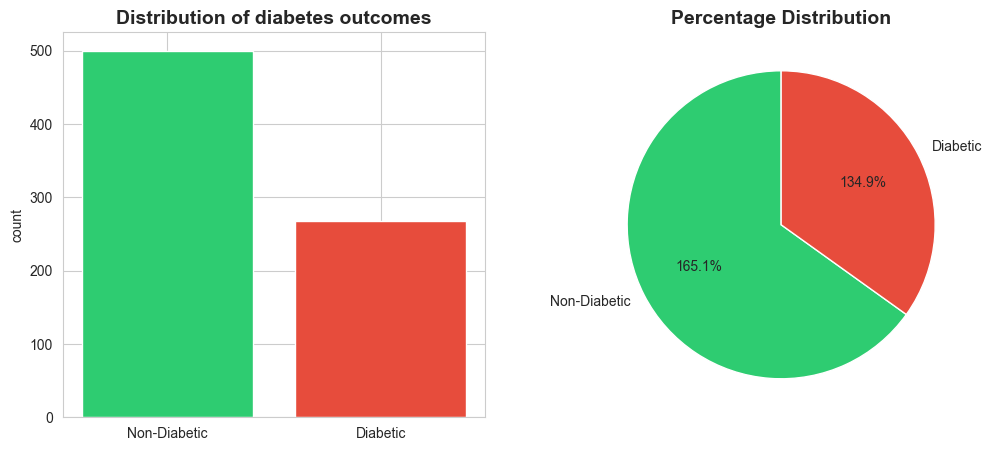

In [45]:
 # Data Visualization
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
outcome_counts =diabetes_dataset['Outcome'].value_counts()
plt.bar(['Non-Diabetic', 'Diabetic'], outcome_counts.values, color=['#2ecc71', '#e74c3c'])
plt.title('Distribution of diabetes outcomes', fontsize=14, fontweight='bold')
plt.ylabel('count')

plt.subplot(1,2,2)
plt.pie(outcome_counts.values, labels=['Non-Diabetic','Diabetic'],
        autopct='1%.1f%%', colors=['#2ecc71', '#e74c3c'], startangle=90)

plt.title('Percentage Distribution', fontsize=14, fontweight='bold')
plt.show()

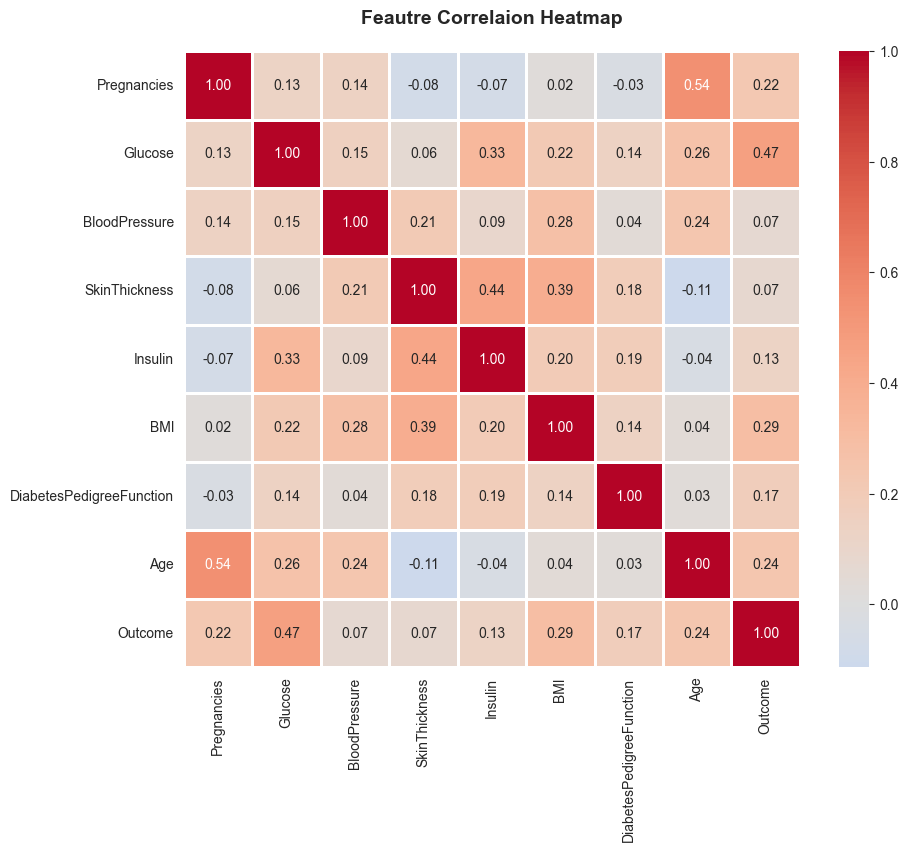

In [46]:
# Correlation statement
plt.figure(figsize=(10,8))
Correlation=diabetes_dataset.corr()
sns.heatmap(Correlation,annot=True,cmap='coolwarm', center=0,square=True, linewidth=1, fmt= '.2f')
plt.title('Feautre Correlaion Heatmap', fontsize=14, pad=20, fontweight='bold')
plt.show ()

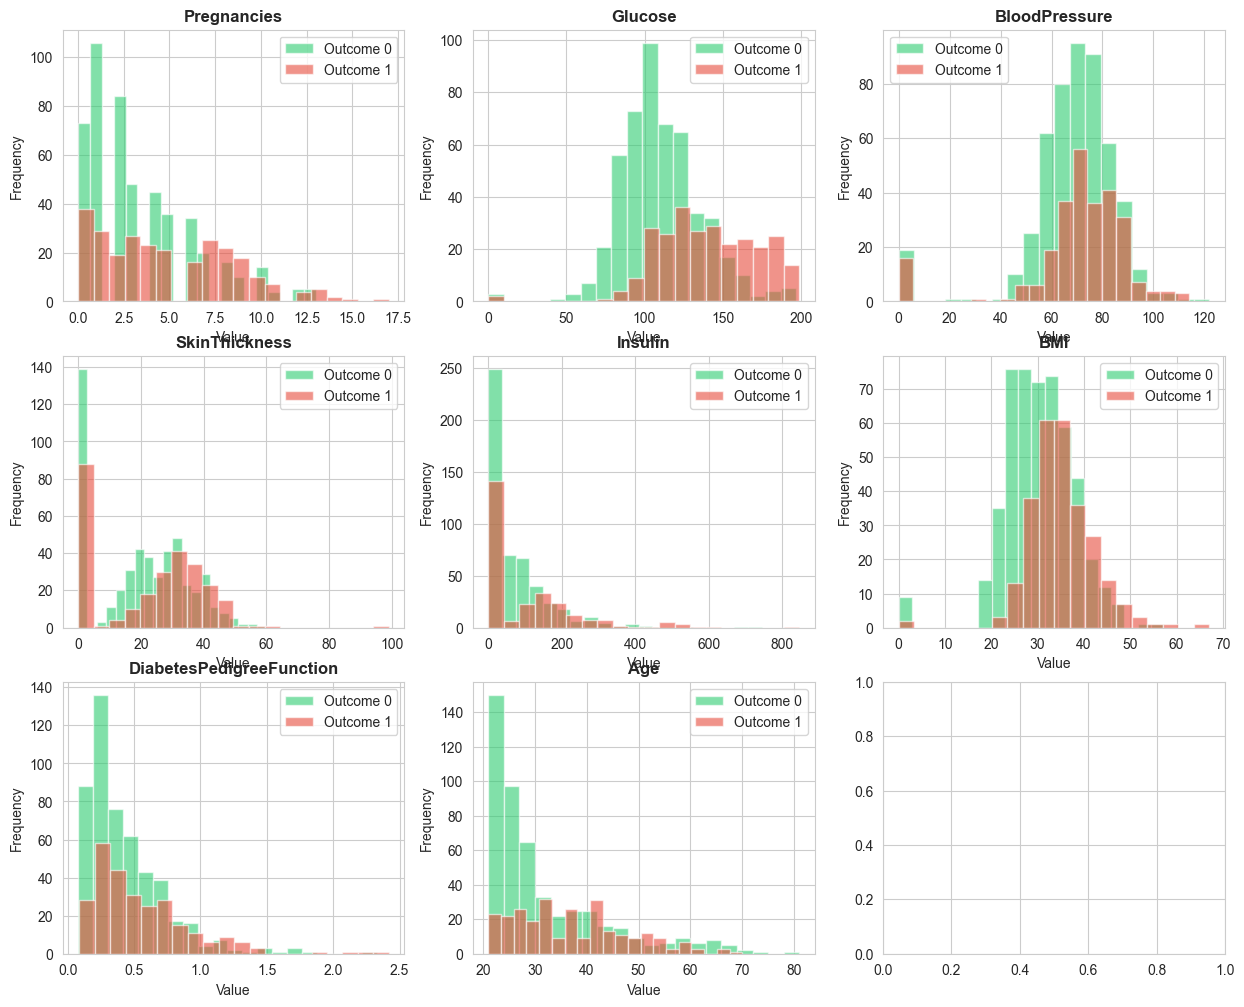

In [47]:
# Visualization of the feature distibution
fig,axes=plt.subplots(3,3,figsize=(15,12))
features=diabetes_dataset.columns[:-1]

for idx,feature in enumerate(features):
  row,col = idx//3, idx % 3
  for outcome in [0,1]:
      data = diabetes_dataset[diabetes_dataset['Outcome'] == outcome][feature]
      axes[row,col].hist(data, alpha=0.6, bins=20, label=f'Outcome {outcome}',
                        color=['#2ecc71', '#e74c3c'][outcome])
      axes[row,col].set_title(feature, fontweight='bold')
      axes[row,col].set_xlabel('Value')
      axes[row,col].set_ylabel('Frequency')
      axes[row,col].legend()
plt.show()

In [48]:
# Data Prepocessing

x = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

print(x)
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [49]:
# Standard Deviation
scaler=StandardScaler()
X = scaler.fit_transform(x)
x


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [50]:
# Splitting the Data
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,stratify= Y, random_state=2)

print(X.shape, x_train.shape, x_test.shape)

(768, 8) (614, 8) (154, 8)


In [51]:
# Train the model
classifier=svm.SVC(kernel='linear', probability=True)
classifier.fit(x_train,y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'linear'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",True
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [52]:
# X_Train Prediction
x_train_prediction=classifier.predict(x_train)
data_accuracy=accuracy_score(x_train_prediction, y_train)
data_accuracy

0.7866449511400652

In [53]:
# X_Test Prediction
x_test_prediction=classifier.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction, y_test)
test_data_accuracy

0.7727272727272727

In [54]:
precision=precision_score(y_test,x_test_prediction)
recall = recall_score(y_test,x_test_prediction)
f1 = f1_score(y_test, x_test_prediction)

print(precision,recall,f1)

0.7567567567567568 0.5185185185185185 0.6153846153846154


In [55]:
# Confusion  matrix
cm_svm=confusion_matrix(y_test, x_test_prediction)
cm_svm

array([[91,  9],
       [26, 28]])

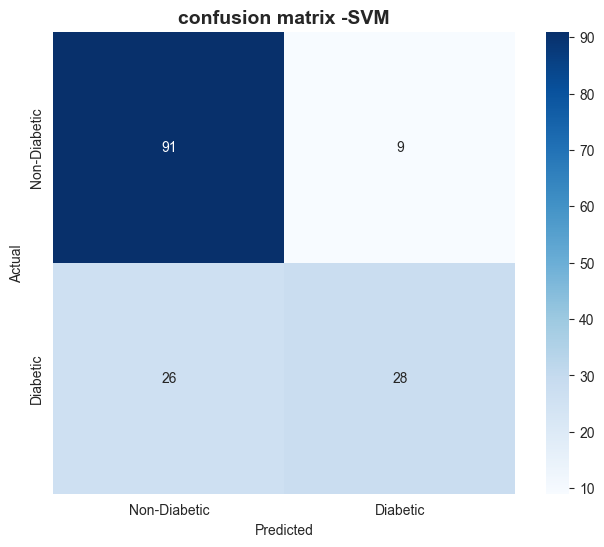

In [56]:
# Visualize confusion matrix

plt.figure(figsize=(8,6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', square=True,
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic','Diabetic'])
plt.title('confusion matrix -SVM', fontsize=14, fontweight='bold')
plt.ylabel("Actual")
plt.xlabel('Predicted')
plt.show()

In [57]:
# Training the random forest
rf_classifer= RandomForestClassifier(n_estimators=100, random_state=2)
rf_classifer.fit(x_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [58]:
x_train_prediction_rf=rf_classifer.predict(x_train)

In [59]:
training_data_accuracy_rf=accuracy_score(x_train_prediction_rf, y_train)
training_data_accuracy_rf

1.0

In [60]:
x_test_prediction_rf=rf_classifer.predict(x_test)
test_data_accuracy_rf = accuracy_score(x_test_prediction_rf,y_test)

In [61]:
x_test_prediction_rf=rf_classifer.predict(x_test)
test_data_accuracy_rf = accuracy_score(x_test_prediction_rf,y_test)

In [62]:
precision_rf = precision_score(y_test, x_test_prediction_rf)

In [63]:
recall_rf = recall_score(y_test,x_test_prediction_rf)

In [64]:
f1_rf = f1_score ( y_test, x_test_prediction_rf )

In [65]:
print(precision_rf,recall_rf,f1_rf)

0.65 0.48148148148148145 0.5531914893617021


In [66]:
cm_rf=confusion_matrix(y_test, x_test_prediction_rf)
print(cm_rf)

[[86 14]
 [28 26]]


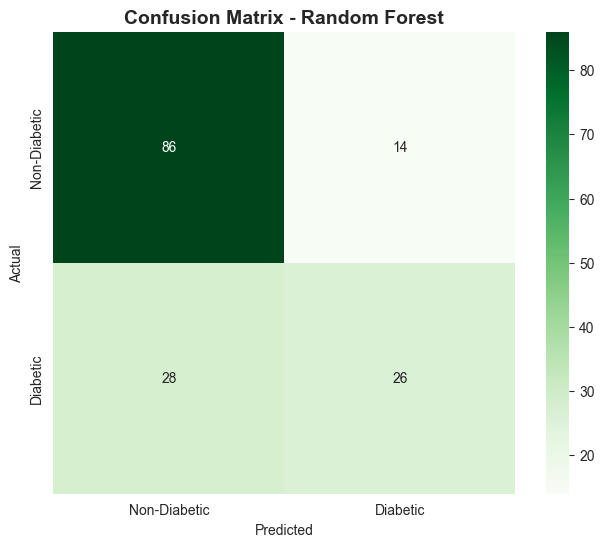

In [67]:
# Visualize confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', square=True,
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix - Random Forest', fontsize=14, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [68]:
 # Differentite which  model is better
print('SVM', test_data_accuracy)
print('Random Forest', test_data_accuracy)

                                              # the best model  is SVM

SVM 0.7727272727272727
Random Forest 0.7727272727272727


In [69]:
# Saving the model not to retrain it again
joblib.dump(classifier, 'diabetes_model.pkl')

['diabetes_model.pkl']

In [70]:
# use of the model with a patient
input_data = (5,166,72,19,175,25.8,0.587,51)
input_num_array = np.asarray(input_data)
reshape = input_num_array.reshape(1,-1)

std_data = scaler.transform(reshape)
prediction  = classifier.predict(std_data)

In [71]:
prediction

array([1])

the prediction show the patient is diabitic,due to high glucose 